**ANN XOR Logic**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
X = np.array([ [1, 1],[0, 0], [1, 0],[0, 1]]) #XOR Gate
y = np.array([ [0], [0], [1], [1]])

In [ ]:
num_input = 2
num_hidden = 3
num_output = 1

In [ ]:
np.random.randn(num_input,num_hidden) #just to test and experience. W_xh matrix

array([[-1.26627373,  0.13154191, -2.27980029],
       [ 1.09247058,  0.67975304,  0.74224165]])

In [ ]:
np.random.randn(num_hidden,num_output)

array([[1.83000804],
       [0.38890241],
       [1.44919806]])

In [ ]:
np.zeros((1,num_hidden))

array([[0., 0., 0.]])

In [ ]:
# Normalized random values for W_xh, b_h
W_xh = np.random.randn(num_input,num_hidden)
b_h = np.zeros((1,num_hidden))

In [ ]:
# Normalized random values for, W_hy b_y
W_hy = np.random.randn (num_hidden,num_output)
b_y = np.zeros((1,num_output))

In [ ]:
def sigmoid(z):
  return 1 / (1+np.exp(-z))

In [ ]:
def sigmoid_derivative(z):
  return np.exp(-z)/((1+np.exp(-z))**2)

In [ ]:
def forward_prop(X,W_xh,W_hy):
  z1 = np.dot(X,W_xh) + b_h
  a1 = sigmoid(z1)
  z2 = np.dot(a1,W_hy) + b_y
  y_hat = sigmoid(z2)
  return z1,a1,z2,y_hat

In [ ]:
def backword_prop(y_hat, z1, a1, z2):
  delta2 = np.multiply(-(y-y_hat),sigmoid_derivative(z2))
  dL_dW_hy = np.dot(a1.T, delta2)
  delta1 = np.dot(delta2,W_hy.T)*sigmoid_derivative(z1)
  dL_dW_xh = np.dot(X.T, delta1)
  return dL_dW_xh, dL_dW_hy

In [ ]:
def cost_function(y, y_hat):
  L = 0.5*sum((y-y_hat)**2)
  return L

In [ ]:
alpha = 0.01
num_iterations = 100000

In [ ]:
cost =[]
for i in range(num_iterations):
  z1,a1,z2,y_hat = forward_prop(X,W_xh,W_hy)
  dL_dW_xh, dL_dW_hy = backword_prop(y_hat, z1, a1, z2)
  #update weights
  W_xh = W_xh -alpha * dL_dW_xh
  W_hy = W_hy -alpha * dL_dW_hy
  #compute cost
  c = cost_function(y, y_hat)
  cost.append(c)

Text(0, 0.5, 'Cost')

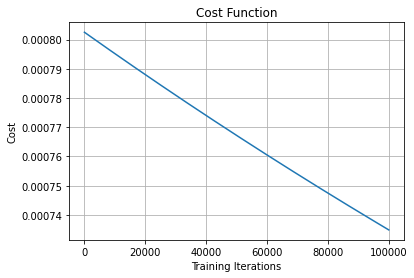

In [ ]:
plt.grid()
plt.plot(range(num_iterations),cost)
plt.title('Cost Function')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

In [ ]:
forward_prop([1,0],W_xh,W_hy)[-1]

array([[0.98251363]])